---

# **Part I: Research Question**

## Research Question

My dataset for this data mining classification exercise includes data on an internet service provider’s current and former subscribers, with an emphasis on customer churn (whether customers are maintaining or discontinuing their subscription to the ISP’s service).  Data analysis performed on the dataset will be aimed with this research question in mind: is there a relationship between customer lifestyle, or “social” factors, and customer churn?  Lifestyle and social factors might include variables such as age, income, and marital status, among others.

---

## Objectives and Goals

Conclusions gleaned from the analysis of this data can benefit stakeholders by revealing information on which customer populations may be more likely to “churn”, or terminate their service contract with the ISP.  For a data mining exercise such as this, I will determine whether a specific classification method, k-nearest neighbor, can accurately classify which customers will churn based on comparing features of customers who do churn with those that do not.  Such information may be used to fuel targeted advertising campaigns, special promotional offers, and other strategies related to customer retention.

---

# **Part II: Method Justification**

## K-Nearest Neighbor

The k-nearest neighbor machine learning algorithm, or KNN, attempts to classify unknown data points by comparing the features of a new data point with those of data points that already have a classification.  The algorithm will identify the new data point's features, select the *k* most similar data points from the known data, and allow those data points to "vote" on which classification the new data point should have.  In my specific scenario, the algorithm will be comparing the social aspects of these data points.

---

## Assumption of KNN

The most important assumption of KNN is that similar things exist in close proximity, or to quote a popular figure of speech, "birds of a feather flock together"(Harrison, 2018).  KNN uses distance metrics (an example being Euclidian distance) to capture the similarity or "proximity" of one data point to another.  KNN is implemented with the hope that such analysis will be accurate enough to be useful in making predictions.

---

## Tool Selection

All code execution was carried out via Jupyter Lab, using Python 3.  I used Python as my selected programming language due to prior familiarity and broader applications when considering programming in general.  R is a very strong and robust language tool for data analysis and statistics but finds itself somewhat limited to that niche role (Insights for Professionals, 2019).

Pictured below is a list of packages imported for the data mining operation.

In [1]:
# Imports and housekeeping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report, roc_auc_score

---

- **NumPy, Pandas, and Matplotlib**

One might consider NumPy, Pandas, and Matplotlib to be a holy trinity of Python data science, as they are likely to be present in any Python code used for data science or data analytics tasks.  NumPy is used for a plethora of mathematical calculations; Pandas is relied upon for data manipulation (and is quite compatible with NumPy), and Matplotlib is the foundation of Python's data plotting features.

- **Scikit-learn**

I used a number of modules and functions from the scikit-learn library:

- StandardScaler - helps to scale numerical features having different ranges
- KNeighborsClassifier - the KNN function itself
- train_test_split - splits a data set into train and test sets, the former used for learning how to predict, and the latter for running and comparing predictions
- GridSearchCV - a useful function for hypertuning, this will be used to determine an optimal value for *k* in KNN
- Pipeline and make_pipeline - used for chaining together a sequence of transformations performed on data prior to predictions
- classification_report and roc_auc_score - these functions will allow me to measure model performance by applying scores and providing additional insights

---

# **Part III: Data Preparation**

## Data Preparation Goals and Data Manipulations

I would like my data to include only variables relevant to my research question, and to be clean and free of missing values and duplicate rows.  It will also be important to re-express any categorical variable types (but not my target variable, "Churn") with numeric values.  My first steps will be to import the complete data set and execute functions that will give me information on its size, the data types of its variables, and a peek at the data in table form.  I will then narrow the data set to a new dataframe containing only the variables I am concerned with, and then utilize functions to determine if any null values or duplicate rows exist.

The data set variables that I will use to perform the analysis for the classification question are listed below.


|Variable|Data Type|Continuous or Categorical|Description|
|---|---|---|---|
|Area|	object	|Categorical	|Type of area customer lives in (urban, suburban, rural)|
|Job|object|Categorical|Customer's occupation|
|Children	|float64	|Continuous	|How many children live in the customer’s household|
|Age	|float64	|Continuous	|Customer’s age|
|Income	|float64	|Continuous	|Customer’s income annually|
|Marital	|object	|Categorical	|Customer’s marital status|
|Gender	|object	|Categorical	|Self-identified gender of the customer|
|Churn	|object	|Categorical	|Yes/No if customer canceled service|
|Tenure|float64	|Continuous	|Length of time in months the customer has maintained service|
|MonthlyCharge|float64	|Continuous	|Amount in dollars the customer is charged per month|
|Bandwidth_GB_Year|float64	|Continuous	|How much bandwidth the customer uses per year|

In [2]:
# Import the main dataset
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [3]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Drops columns with no relevance to the research question
df_data = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng',
                   'Population', 'TimeZone', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Techie',
                   'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
                   'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [5]:
# Display dataset top 5 rows
df_data.head()

,Area,Job,Children,Age,Income,Marital,Gender,Churn,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,6.795513,172.455519,904.536110
1,Urban,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,1.156681,242.632554,800.982766
2,Urban,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,15.754144,159.947583,2054.706961
3,Suburban,Solicitor,1,48,18925.23,Married,Male,No,17.087227,119.956840,2164.579412
4,Suburban,Medical illustrator,0,83,40074.19,Separated,Male,Yes,1.670972,149.948316,271.493436


In [6]:
# Display data set number of rows and colums
df_data.shape

(10000, 11)

In [7]:
# Check data for null or missing values
df_data.isna().any()

Area                 False
Job                  False
Children             False
Age                  False
Income               False
Marital              False
Gender               False
Churn                False
Tenure               False
MonthlyCharge        False
Bandwidth_GB_Year    False
dtype: bool

In [8]:
# Check data for duplicated rows
df_data.duplicated().sum()

0

---

I can use the describe() function to display the summary statistics for the entire dataframe, as well as each variable I'll be evaluating for inclusion.  I have selected the Churn variable as my target variable.

In [9]:
# Display summary statistics for entire dataset - continuous variables
df_data.describe()

,Children,Age,Income,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,61.479795,200.734725,5586.141370
max,10.0000,89.000000,258900.700000,71.999280,290.160419,7158.981530


In [10]:
# Display summary statistics for entire dataset - categorical variables
df_data.describe(include = object)

,Area,Job,Marital,Gender,Churn
count,10000,10000,10000,10000,10000
unique,3,639,5,3,2
top,Suburban,Occupational psychologist,Divorced,Female,No
freq,3346,30,2092,5025,7350


---

Immediately I can tell there is a problem with the Job variable.  For most of the categorical variables I will be using one-hot encoding to generate their numerical equivalents, but the Job variable has far too many unique values for this to be feasible.  There may be a way to sort the jobs into categories and then use a form of label encoding, but for the purpose of this exercise I will be excluding the Job variable.

In [11]:
# Too many unique values, drop Job column
df_data = df_data.drop(['Job'], axis=1)

In [12]:
# Display summary statistics for dataset - categorical variables
df_data.describe(include = object)

,Area,Marital,Gender,Churn
count,10000,10000,10000,10000
unique,3,5,3,2
top,Suburban,Divorced,Female,No
freq,3346,2092,5025,7350


---

Now that the unique values for my categorical variables are under control, I can move forward with one-hot encoding via the Pandas get_dummies() function.  This will create new columns for each unique value for these variables, then remove the original variables from the data set.

In [13]:
# Convert categorical variables (excluding Churn) to numeric via pd.get_dummies
df_data = pd.get_dummies(df_data, columns = ['Area', 'Marital', 'Gender'], dtype = int)

---

My data manipulations are now complete, and I can once again view the info for the reduced data set, along with a preview of the contents.

In [14]:
# Display dataset info
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Children               10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Income                 10000 non-null  float64
 3   Churn                  10000 non-null  object 
 4   Tenure                 10000 non-null  float64
 5   MonthlyCharge          10000 non-null  float64
 6   Bandwidth_GB_Year      10000 non-null  float64
 7   Area_Rural             10000 non-null  int64  
 8   Area_Suburban          10000 non-null  int64  
 9   Area_Urban             10000 non-null  int64  
 10  Marital_Divorced       10000 non-null  int64  
 11  Marital_Married        10000 non-null  int64  
 12  Marital_Never Married  10000 non-null  int64  
 13  Marital_Separated      10000 non-null  int64  
 14  Marital_Widowed        10000 non-null  int64  
 15  Gen

In [15]:
# Display dataset top 5 rows
df_data.head()

,Children,Age,Income,Churn,Tenure,MonthlyCharge,Bandwidth_GB_Year,Area_Rural,Area_Suburban,Area_Urban,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary
0,0,68,28561.99,No,6.795513,172.455519,904.536110,0,0,1,0,0,0,0,1,0,1,0
1,1,27,21704.77,Yes,1.156681,242.632554,800.982766,0,0,1,0,1,0,0,0,1,0,0
2,4,50,9609.57,No,15.754144,159.947583,2054.706961,0,0,1,0,0,0,0,1,1,0,0
3,1,48,18925.23,No,17.087227,119.956840,2164.579412,0,1,0,0,1,0,0,0,0,1,0
4,0,83,40074.19,Yes,1.670972,149.948316,271.493436,0,1,0,0,0,0,1,0,0,1,0


---

## Copy of Prepared Data Set

Below is the code used to export the prepared data set to CSV format.

In [16]:
# Export prepared dataframe to CSV
df_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/churn_clean_perpared.csv')

---

# **Part IV: Analysis**

## Splitting the Data

Below I will use the train_test_split function to split my data set into training and testing sets.  I will use a 0.25 split, which is a good rule of thumb value.  This means that 75% of my data will be used to train the KNN algorithm, and 25% of the data will be used to test the classification.  Once split, the train and test sets for both the features and the target will be exported in CSV format.

In [17]:
# Generate train/test split
y = df_data['Churn'].values
X = df_data.drop('Churn', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21, stratify=y)

In [18]:
# Create dataframes from train/test splits and export as CSV
X_train_data = pd.DataFrame(data = X_train)
X_train_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/X_train.csv')
X_test_data = pd.DataFrame(data = X_test)
X_test_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/X_test.csv')
y_train_data = pd.DataFrame(data = y_train)
y_train_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/y_train.csv')
y_test_data = pd.DataFrame(data = y_test)
y_test_data.to_csv(r'/home/wstults/anaconda3/Jupyter/d209/y_test.csv')

---

## Analysis Technique

It makes sense to first attempt to determine an optimal value for *k*, so I will begin by utilizing the GridSearchCV function to calculate this.  With a *k* value that is too low, KNN looks only at those neighbors closest to the data point and can form some overly complex decision boundaries.  If it is too high, the algorithm draws upon more data to make its decision but this comes at the cost of reduced performance and predictive power.

I will use StandardScaler to bring my data set's features with large numerical ranges more in line with the rest of the data set, then have GridSearchCV iterate through *k* values ranging from 1 to 50.  The resulting best *k* value will be printed, along with an accuracy score and the classification report.

In [19]:
# Set up pipeline with StandardScaler and knn
steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
# Define parameters and set up Gridsearch
parameters = {'knn__n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(pipeline, param_grid=parameters)
# Fit Gridsearch and run predictions
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
# Print results
print(cv.best_params_)
print(cv.score(X_test, y_test))
print(classification_report(y_test, y_pred))

{'knn__n_neighbors': 25}
0.8104
              precision    recall  f1-score   support

          No       0.83      0.93      0.88      1837
         Yes       0.71      0.48      0.57       663

    accuracy                           0.81      2500
   macro avg       0.77      0.71      0.73      2500
weighted avg       0.80      0.81      0.80      2500



---

I can visualize the model's accuracy at each level of *k* by plotting the results for both the train and test sets.  I can see below that the *k* value of 25 appears to be the "sweet spot" where accuracy and complexity are optimized.

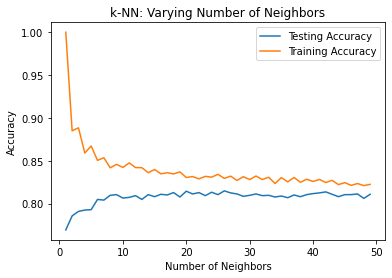

In [20]:
# Setup arrays for knn values and to store train and test accuracies
neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors and pipeline with Standard
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = make_pipeline(StandardScaler(), knn)
    # Fit the pipeline to the training data
    pipe.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = pipe.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = pipe.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

---

Lastly, I can make use of the roc_auc_score function to determine an AUC score for the algorithm.  AUC is the measure of the ability of a classifier to distinguish between classes, and higher AUC will reflect better performance by the model when distinguishing customers that churn from those who don't (Bhandari, 2020).

In [21]:
# Define knn and pipe
knn = KNeighborsClassifier(n_neighbors=25)
pipe = make_pipeline(StandardScaler(), knn)
# fit pipe to model
pipe.fit(X_train, y_train)
# predict probabilities
pred_prob = pipe.predict_proba(X_test)
# generate auc score
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

0.8621605000611692


---

# **Part V: Data Summary and Implications**

## Summary of Findings

At a *k* value of 25, the algorithm resulted in an accuracy score of 0.8104, indicating a roughly 81% chance of successfully classifying an unknown data point as churned or not churned.

There is speculation over what kind of AUC score is "good", but the below is a good rule of thumb according to Zach (2021):

- 0.5 = No discrimination
- 0.5-0.7 = Poor discrimination
- 0.7-0.8 = Acceptable discrimination
- 0.8-0.9= Excellent discrimination
- Greater than 0.9 = Outstanding discrimination

By these standards, the algorithm's AUC score of 0.86 falls within the "excellent discrimination" level.  While the AUC and accuracy scores indicate the model could certainly stand improvement, I would consider this a very good start, and the results do indicate a relationship between social factors and churn.

One limitation of this data analysis is that k-nearest neighbors does not typically work well with large datasets.  With 10,000 rows, the churn dataset is certainly on the larger side when compared to many of the sample datasets used for learning, and using the KNN algorithm with datasets of considerable size causes a performance penalty when it has to perform the more complex distance calculations (Jain, 2020).


---

## Recommended Course of Action

The results of my analysis indicate an algorithm similar to mine could reliably predict which customers are in danger of churning.  It may be beneficial to offer those customers classified in this way special promotional rates or product enhancements to entice them into remaining customers.  The results also merit a deeper evaluation of why customers were classified the way they were in order to pinpoint features having a greater impact on churn.

---

# **Part VI: Demonstration**

**Panopto Video Recording**

A link for the Panopto video has been provided separately.  The demonstration includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

---

# **Web Sources**

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/



---

# **References**


Insights for Professionals. (2019, February 26). *5 Niche Programming Languages (And Why They're Underrated).* https://www.insightsforprofessionals.com/it/software/niche-programming-languages


Bhandari, A.  (2020, June 16).  *AUC-ROC Curve in Machine Learning Clearly Explained.*  Analytics Vidhya.  https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/


Harrison, O.  (2018, September 10).  *Machine Learning Basics with the K-Nearest Neighbors Algorithm.*   Towards Data Science.  https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761


Zach.  (2021, September 9).  *What is Considered a Good AUC Score?.*  Statology.  https://www.statology.org/what-is-a-good-auc-score/


Jain, D.  (2020, July 17).  *KNN: Failure cases, Limitations, and Strategy to Pick the Right K.*  Level Up Coding.  https://levelup.gitconnected.com/knn-failure-cases-limitations-and-strategy-to-pick-right-k-45de1b986428

